# Analysis

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
directory = '../data/processed/'
videos_df = pd.read_json(directory + 'videos-translated.json', convert_dates=['createTime'])
pd.set_option('display.max_colwidth', None)

How often was Meloni Posting?

## Election Dates
- 25 September 2022 - election
- 21 July 2022 - parliament dissolved after the fall of the Draghi government President Sergio Mattarella

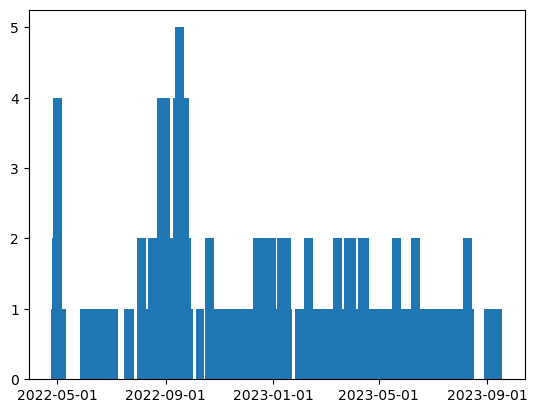

In [329]:
videos_df['createTime'] = pd.to_datetime(videos_df['createTime'])
videos_df['createTime']
videos_df['createTime'].index

df = videos_df['createTime'].groupby(videos_df['createTime'].dt.floor('d')).size().reset_index(name='count')
df = df.sort_values('count', ascending=False)

x = df['createTime']
y = df['count']
ax = plt.subplot(111)
ax.bar(x, y, width=10)
ax.set_xticks(ax.get_xticks()[::2])
ax.xaxis_date()

plt.savefig('../data/processed/images/posts-over-time.png')
plt.show()


## Plays

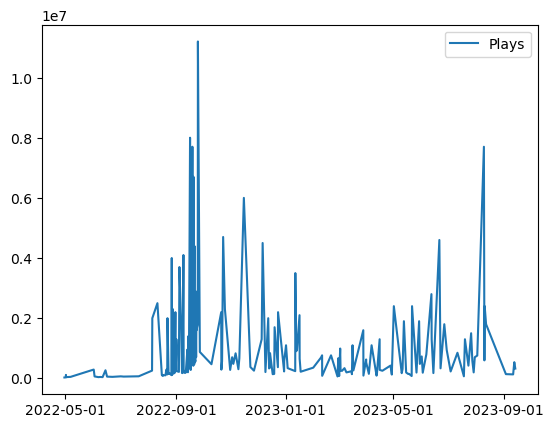

In [333]:
x = videos_df['createTime']
play_count_y = videos_df['playCount']
# this must be an integer out of bounds

ax = plt.subplot(111)
ax.plot(x, play_count_y, label = "Plays")
plt.legend()
ax.set_xticks(ax.get_xticks()[::2])
plt.savefig('../data/processed/images/plays.png')
plt.show()

In [345]:
df = videos_df.sort_values(by=['playCount'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['createDate', 'desc_en', 'playCount']].head(10) 

,createDate,desc_en,playCount
110,2022-09-25,September 25: I've said it all.,11200000
130,2022-09-16,Let's clarify (once again) our position regarding the law on abortion. Enough lies!,8000000
123,2022-09-19,Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.,7700000
7,2023-08-09,"The new rules on citizenship income are starting to come into force in recent days. It is good to clarify this topic, especially after the controversy and the many falsehoods that have been told. The Government does not intend to retrace its steps: our great objective is to move from citizenship income to employment income, the one obtained thanks to work. #gliappuntidigiorgia",7700000
121,2022-09-20,September 25th is approaching. You are ready? #VoteFdI,6700000
96,2022-11-15,"Today and tomorrow in Bali to participate in the #G20Indonesia and important bilateral meetings. Faced with the challenges of our time, we need to dialogue and work together to find solutions to global crises.",6000000
124,2022-09-18,I have a complaint to make. Listen carefully…,5000000
104,2022-10-23,It begins. With a lot of emotion but also with the awareness of the difficult challenges that await us. Now it's our turn: we are ready 🇮🇹,4700000
21,2023-06-21,Good luck to all graduates!,4600000
92,2022-12-06,"Work can take you anywhere, while citizenship income leaves you where you are. And we have chosen to believe in Italy and Italians. #Giorgia'snotes",4500000


In [347]:
df = videos_df.sort_values(by=['playCount'], ascending=True)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['createDate', 'desc_en', 'playCount']].head(10) 

,createDate,desc_en,playCount
204,2022-04-29,"My opening speech has just finished at the Fratelli d'Italia programmatic conference, which you can review on my Facebook page",25100
205,2022-04-13,"This is a #government that cannot decide anything on an international, national and economic level. A majority that just gets by. So if #Draghi went home, it would be good news.",28200
211,2022-03-12,"Some characters try in every way, every day, to paint a version of me that is very different from reality. Too bad for them, lies can easily be proven wrong.",28700
203,2022-04-29,The only reason why we want to get to the top is because from there we know we can look further. #EnergyToLiberate,29200
208,2022-03-24,"Always on the same side, that of the #Italians.",31100
202,2022-04-30,Freedom? In the last two years it has been sacrificed due to the incompetence of a certain political class. It's time to say enough. #energytoliberate,31100
221,2022-02-11,Let it be clear to everyone: we will never form a government with the PD and with the left. Our values ​​are and will remain those of the right and center-right.,33000
201,2022-04-30,"Europe presented itself at the rendezvous of history without a defense, without a foreign policy, incapable of carrying out any diplomatic action. American interference is a European choice and it is a wrong choice.",34300
198,2022-05-01,"While some journalists have used their time to pass off #fratelliditalia as a party of unpresentable people, we have built a serious, credible, modern, respected #right that has not allowed itself to be pushed into a corner. Let them continue telling fairy tales, in the meantime we'll make history.",35700
218,2022-02-21,"Unlike many others, we have never defended privileges. We are defending #work and entrepreneurs who had trusted the State and now have to fight tooth and nail to save their business. #fratelliditalia #cameradeideputati",36300


## Engagement

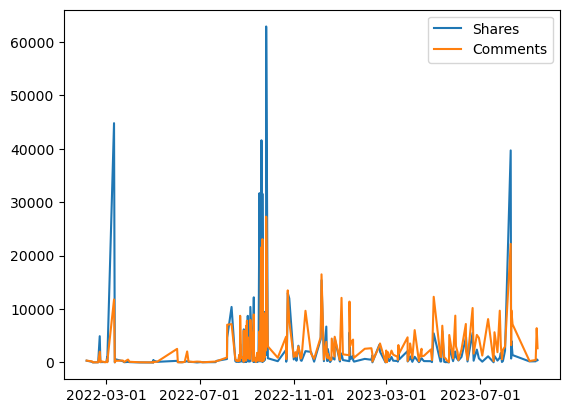

In [348]:
x = videos_df['createTime']
share_count_y = videos_df['shareCount']
comment_count_y = videos_df['commentCount']

ax = plt.subplot(111)
ax.plot(x, share_count_y, label = "Shares")
ax.plot(x, comment_count_y, label = "Comments")
plt.legend()
ax.set_xticks(ax.get_xticks()[::2])
plt.savefig('../data/processed/images/engagement.png')
plt.show()

## Most Shared

In [350]:
df = videos_df.sort_values(by=['shareCount'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['createDate', 'desc_en', 'shareCount']].head(20) 

,createDate,desc_en,shareCount
110,2022-09-25,September 25: I've said it all.,62900
212,2022-03-11,"In the midst of an international crisis and in full economic #emergency, what will the ""#government of the best"" take care of? Extend the #greenpass. A senseless madness and without any scientific evidence. #Brothers of Italy",44800
123,2022-09-19,Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.,41600
7,2023-08-09,"The new rules on citizenship income are starting to come into force in recent days. It is good to clarify this topic, especially after the controversy and the many falsehoods that have been told. The Government does not intend to retrace its steps: our great objective is to move from citizenship income to employment income, the one obtained thanks to work. #gliappuntidigiorgia",39700
130,2022-09-16,Let's clarify (once again) our position regarding the law on abortion. Enough lies!,31700
121,2022-09-20,September 25th is approaching. You are ready? #VoteFdI,31600
92,2022-12-06,"Work can take you anywhere, while citizenship income leaves you where you are. And we have chosen to believe in Italy and Italians. #Giorgia'snotes",15400
104,2022-10-23,It begins. With a lot of emotion but also with the awareness of the difficult challenges that await us. Now it's our turn: we are ready 🇮🇹,13000
143,2022-09-09,"Enrico, sleep peacefully.",12200
103,2022-10-25,"At the end of this adventure, only one thing will interest me: knowing that we have done everything we could to give Italians a better nation. Rest assured that we will not give up, we will not retreat, and we will not betray.",12000


## Most Commented On

In [351]:
df = videos_df.sort_values(by=['commentCount'], ascending=False)
df['createDate'] = df['createTime'].dt.strftime('%Y-%m-%d')
df[['createDate', 'desc_en', 'commentCount']].head(20) 

,createDate,desc_en,commentCount
110,2022-09-25,September 25: I've said it all.,27300
121,2022-09-20,September 25th is approaching. You are ready? #VoteFdI,23100
7,2023-08-09,"The new rules on citizenship income are starting to come into force in recent days. It is good to clarify this topic, especially after the controversy and the many falsehoods that have been told. The Government does not intend to retrace its steps: our great objective is to move from citizenship income to employment income, the one obtained thanks to work. #gliappuntidigiorgia",22200
123,2022-09-19,Supporting the most vulnerable and giving a prospect of work and well-being to everyone else: we will leave no one behind. Here's what we want to do with #citizenshipincome. Listen.,21600
124,2022-09-18,I have a complaint to make. Listen carefully…,19300
92,2022-12-06,"Work can take you anywhere, while citizenship income leaves you where you are. And we have chosen to believe in Italy and Italians. #Giorgia'snotes",16500
104,2022-10-23,It begins. With a lot of emotion but also with the awareness of the difficult challenges that await us. Now it's our turn: we are ready 🇮🇹,13500
39,2023-05-01,May 1st: the Government celebrates with facts. Even today at work to improve the conditions of workers.,12300
79,2023-01-01,"To you, to your families, happy 2023.",12100
212,2022-03-11,"In the midst of an international crisis and in full economic #emergency, what will the ""#government of the best"" take care of? Extend the #greenpass. A senseless madness and without any scientific evidence. #Brothers of Italy",11800


## Hashtag Counts - English

In [319]:
df = videos_df[['textExtra', 'textExtra_en']].dropna()
df['textExtra_en'] = df['textExtra_en'].str.split(',')

df_en = pd.DataFrame(df['textExtra_en'].tolist()).fillna('').add_prefix('textExtra_en_')
df_en.replace('', None, inplace=True)
df_en = df_en.melt()
df_en.replace('', None, inplace=True)
df_en.dropna(inplace=True)
df_en['value'] = df_en['value'].str.strip()
df_en = df_en.groupby('value')['value'].count().reset_index(name='count')
df_en = df_en.sort_values(by=['count'], ascending=False)
df_en.head(50)


,value,count
36,giorgia's notes,11
31,fratelliditalia,7
56,votefdi,5
3,Brothers of Italy,3
28,energytoliberate,2
39,hoax,2
9,Republic Day,2
57,work,2
1,Basic income,2
34,g20indonesia,1


In [320]:
df = videos_df[['textExtra', 'textExtra_en']].dropna()
df['textExtra_it'] = df['textExtra'].str.split(',')

df_it = pd.DataFrame(df['textExtra_it'].tolist()).fillna('').add_prefix('textExtra_it_')
df_it.replace('', None, inplace=True)
df_it = df_it.melt()
df_it.replace('', None, inplace=True)
df_it.dropna(inplace=True)
df_it['value'] = df_it['value'].str.strip()
df_it = df_it.groupby('value')['value'].count().reset_index(name='count')
df_it = df_it.sort_values(by=['count'], ascending=False)
df_it.head(50)

,value,count
31,gliappuntidigiorgia,11
25,fratelliditalia,10
56,votafdi,5
46,redditodicittadinanza,3
8,bufala,2
22,festadellarepubblica,2
38,lavoro,2
18,energiadaliberare,2
41,madeinitaly,1
33,hiroshima,1


TikToks Content Warning WarnInfo

WarnInfo